In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

df = pd.read_json('../../data/dataset-2.json').replace(np.nan, 0)
df.head()

,contestId,index,name,rating,timeLimit,memoryLimit,statement,tags.hashing,tags.string suffix structures,tags.strings,...,tags.probabilities,tags.meet-in-the-middle,tags.interactive,tags.2-sat,tags.chinese remainder theorem,tags.graph matchings,tags.fft,tags.*special,tags.schedules,tags.expression parsing
0,2010,C2,Message Transmission Error (hard version),1700.0,2,256,This is a more difficult version of the proble...,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,C1,Message Transmission Error (easy version),1400.0,2,256,This is a simplified version of the problem. I...,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,B,Three Brothers,800.0,1,256,Three brothers agreed to meet. Let's number th...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,A,Alternating Sum of Numbers,800.0,2,256,You are given a sequence of integers. Output t...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,G3,Yunli's Subarray Queries (extreme version),2700.0,3,512,This is the extreme version of the problem. In...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Get all columns that start with 'tags.'
tag_columns = [col for col in df.columns if col.startswith('tags.')]
print('tag_columns:', tag_columns)
print('tag_columns count:', len(tag_columns))
# Get the dataframe data in those columns
tags_df = df[tag_columns]
tags_df

tag_columns: ['tags.hashing', 'tags.string suffix structures', 'tags.strings', 'tags.two pointers', 'tags.brute force', 'tags.implementation', 'tags.math', 'tags.data structures', 'tags.dp', 'tags.binary search', 'tags.bitmasks', 'tags.flows', 'tags.ternary search', 'tags.geometry', 'tags.greedy', 'tags.number theory', 'tags.combinatorics', 'tags.dsu', 'tags.graphs', 'tags.constructive algorithms', 'tags.dfs and similar', 'tags.trees', 'tags.divide and conquer', 'tags.games', 'tags.sortings', 'tags.matrices', 'tags.shortest paths', 'tags.probabilities', 'tags.meet-in-the-middle', 'tags.interactive', 'tags.2-sat', 'tags.chinese remainder theorem', 'tags.graph matchings', 'tags.fft', 'tags.*special', 'tags.schedules', 'tags.expression parsing']
tag_columns count: 37


,tags.hashing,tags.string suffix structures,tags.strings,tags.two pointers,tags.brute force,tags.implementation,tags.math,tags.data structures,tags.dp,tags.binary search,...,tags.probabilities,tags.meet-in-the-middle,tags.interactive,tags.2-sat,tags.chinese remainder theorem,tags.graph matchings,tags.fft,tags.*special,tags.schedules,tags.expression parsing
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9555,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9556,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9557,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Messure the frequency of each tag and how imbalance the dataset is
print('Tags Frequency:')
tags_freq = df[tag_columns].sum().sort_values(ascending=False)
print(tags_freq)
# Imbalace Ratio
ir = tags_freq.iloc[0]/tags_freq.iloc[-1]
# Coefficient of Variation
cv = tags_freq.std()/tags_freq.mean()
print('\nImbalance Ratio:', ir)
print('Coefficient of Variation:', cv)

Tags Frequency:
tags.math                         2862.0
tags.greedy                       2836.0
tags.implementation               2715.0
tags.dp                           2100.0
tags.data structures              1720.0
tags.constructive algorithms      1719.0
tags.brute force                  1679.0
tags.sortings                     1057.0
tags.binary search                1055.0
tags.graphs                       1044.0
tags.dfs and similar               918.0
tags.trees                         809.0
tags.number theory                 738.0
tags.strings                       725.0
tags.combinatorics                 669.0
tags.bitmasks                      565.0
tags.two pointers                  534.0
tags.*special                      419.0
tags.geometry                      382.0
tags.dsu                           346.0
tags.divide and conquer            289.0
tags.shortest paths                263.0
tags.probabilities                 231.0
tags.games                         228.0


In [4]:
# Define the tags
tags = ['tags.data structures', 'tags.greedy', 'tags.implementation', 'tags.combinatorics', 'tags.math', 
        'tags.dp', 'tags.trees', 'tags.bitmasks', 'tags.constructive algorithms', 'tags.interactive', 
        'tags.sortings', 'tags.brute force', 'tags.strings', 'tags.geometry', 'tags.flows', 'tags.graphs', 
        'tags.binary search', 'tags.hashing', 'tags.probabilities', 'tags.number theory', 'tags.dsu', 
        'tags.shortest paths', 'tags.games', 'tags.string suffix structures', 'tags.dfs and similar', 
        'tags.two pointers', 'tags.divide and conquer', 'tags.graph matchings', 'tags.ternary search', 
        'tags.*special', 'tags.chinese remainder theorem', 'tags.fft', 'tags.meet-in-the-middle', 
        'tags.matrices', 'tags.2-sat', 'tags.expression parsing', 'tags.schedules']

# Create a dictionary dividing them into super categories
super_categories = {
    'implementation': [
        'tags.implementation', 'tags.constructive algorithms'
    ],
    'maths': [
        'tags.math', 'tags.geometry', 'tags.matrices', 'tags.combinatorics', 'tags.probabilities', 
        'tags.number theory', 'tags.chinese remainder theorem', 'tags.fft',
    ],
    'graphs': [
        'tags.trees', 'tags.dsu', 'tags.shortest paths', 'tags.data structures',
        'tags.dfs and similar', 'tags.flows', 'tags.graphs', 'tags.graph matchings',
    ],
    'optimization': [
        'tags.greedy', 'tags.dp', 'tags.two pointers', 'tags.sortings', 'tags.brute force', 
        'tags.binary search', 'tags.divide and conquer', 'tags.meet-in-the-middle', 
    ],
    'special-strings': [
        'tags.*special', 'tags.2-sat', 'tags.ternary search', 'tags.schedules', 'tags.games', 
        'tags.bitmasks', 'tags.interactive', 'tags.strings', 'tags.string suffix structures', 
        'tags.hashing', 'tags.expression parsing',
    ]
}

In [5]:
supertag_columns = [f'supertag.{key}' for key in super_categories]
for key in supertag_columns:
    df[key] = df[super_categories[key.split('.')[1]]].any(axis=1)
df[supertag_columns] = df[supertag_columns].astype(int)
df[supertag_columns]

,supertag.implementation,supertag.maths,supertag.graphs,supertag.optimization,supertag.special-strings
0,0,0,0,1,1
1,0,0,0,1,1
2,1,1,0,1,0
3,1,1,0,1,0
4,1,0,1,1,0
...,...,...,...,...,...
9554,0,1,0,1,0
9555,1,0,0,0,1
9556,0,1,0,0,0
9557,1,1,0,0,0


In [6]:
# Messure the frequency of each tag and how imbalance the dataset is
print('SuperTags Frequency:')
sup_freq = df[supertag_columns].sum()
supertags_freq = sup_freq.sort_values(ascending=False)
print(supertags_freq)
# Imbalace Ratio
ir = supertags_freq.iloc[0]/supertags_freq.iloc[-1]
# Coefficient of Variation
cv = supertags_freq.std()/supertags_freq.mean()
print('\nImbalance Ratio:', ir)
print('Coefficient of Variation:', cv)

SuperTags Frequency:
supertag.optimization       6211
supertag.implementation     4030
supertag.maths              3658
supertag.graphs             3223
supertag.special-strings    2243
dtype: int64

Imbalance Ratio: 2.7690592955862683
Coefficient of Variation: 0.37895566800050356


In [7]:
y_data = df[supertag_columns].values
y_data.shape

(9559, 5)

In [8]:
import re

def clean_text(text):
    # replace all the special characters with space
    text=text.replace('+',' plus ')
    text=text.replace('-',' minus ')
    text=text.replace('*',' times ')
    text=text.replace('^',' power ')
    text=text.replace('/',' divide ')
    text=text.replace('<',' le ')
    text=text.replace('>',' ge ')
    text=text.replace('≤',' leq ')
    text=text.replace('<=',' leq ')
    text=text.replace('≥',' geq ')
    text=text.replace('>=',' geq ')
    text=text.replace('=',' equal ')
    text=text.replace('#',' numerical ')
    
    text = re.sub(r'[_\'\"]', '', text)

    text = re.sub(r'\W', ' ', text)
    return text

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

wordbag = set()
statements = df['statement'].apply(str.lower).apply(clean_text)

stop_words = set(stopwords.words('english'))

tokens = [[word for word in word_tokenize(st) if word not in stop_words and word] for st in statements]

for st_tok in tokens:
    wordbag.update(set(st_tok))
len(wordbag)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


26047

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

idx2word = {i + 1: word for i, word in enumerate(wordbag)}
word2idx = {word: i + 1 for i, word in enumerate(wordbag)}

x_tokens = [[word2idx[word] for word in st_tok] for st_tok in tokens]

x_tokens = pad_sequences(x_tokens, padding='post', maxlen=500)
x_tokens

array([[ 3156,  1461, 17590, ...,     0,     0,     0],
       [ 9872,  1461, 17590, ...,     0,     0,     0],
       [21405, 24295, 23519, ...,     0,     0,     0],
       ...,
       [20373, 23061, 11845, ...,     0,     0,     0],
       [13433, 25847, 12763, ...,     0,     0,     0],
       [25580, 11824, 18115, ...,     0,     0,     0]])

In [11]:
x_tokens.shape

(9559, 500)

In [12]:
from gensim.models import Word2Vec
emb_size=128
cbow_model = Word2Vec.load(f'../models/cbow_{emb_size}.model')
sg_model = Word2Vec.load(f'../models/sg_{emb_size}.model')
def get_embedding_matrix(x_tokens, w2vModel):
    new_x_data = []
    for row in x_tokens:
        new_row = []
        for word in row:
            new_row.append(w2vModel.wv[idx2word[word]] if word != 0 and (idx2word[word] in w2vModel.wv) else np.zeros(emb_size))
        new_x_data.append(new_row)
    return np.array(new_x_data)

In [13]:
# Get the weight for imbalanced classes
class_weights = len(df) / (len(sup_freq) * sup_freq)
class_weights.values

array([0.47439206, 0.52263532, 0.59317406, 0.30780873, 0.85234062])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tokens, y_data, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7647, 500), (7647, 5), (1912, 500), (1912, 5))

In [15]:
useSG = True
x_train = get_embedding_matrix(x_train, sg_model if useSG else cbow_model)
x_test = get_embedding_matrix(x_test, sg_model if useSG else cbow_model)

In [16]:
def weighted_binary_crossentropy(class_weights):
    def loss_fn(y_true, y_pred):
        # Calculate binary cross-entropy
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        
        # Apply class weights
        weighted_bce = bce * class_weights
        return tf.reduce_mean(weighted_bce)
    
    return loss_fn

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, AveragePooling1D

output_size = y_train.shape[1]

model = Sequential()
# if not word2vec:
#     model.add(Embedding(len(wordbag)+1, embedding_size, input_shape=(x_train.shape[1],)))
model.add(Conv1D(64, 5, strides=2, activation='relu', padding='same', input_shape=x_train.shape[1:]))
# model.add(MaxPooling1D(5))
model.add (AveragePooling1D(5))
# model.add(Conv1D(16, 5, strides=1, activation='relu', padding='same', input_shape=x_train.shape[1:]))
# model.add(MaxPooling1D(5))
# model.add(Bidirectional(LSTM(256, recurrent_dropout=0.5, return_sequences=True)))
# model.add(Dropout(0.5))
# model.add(Conv1D(16, 5, activation='relu', padding='same'))
# model.add(MaxPooling1D(5))
# model.add(Bidirectional(LSTM(128, recurrent_dropout=0.5, return_sequences=True)))
# model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.5, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.5, kernel_regularizer=tf.keras.regularizers.L2(0.001))))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(output_size, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['binary_accuracy', 'f1_score'])
# model.compile(loss=weighted_binary_crossentropy(class_weights.values),
#               optimizer='adam', metrics=['binary_accuracy', 'f1_score'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 250, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_4             │ (None, 50, 64)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 50, 256)        │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,669 (2.48 MB)

 Trainable params: 649,669 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_binary_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=10, mode='max', restore_best_weights=True)

In [46]:
history=model.fit(x_train,y_train,epochs=100, batch_size=32, verbose=2, validation_data=(x_test, y_test),
                  callbacks=[checkpoint, early_stopping])

Epoch 1/100
239/239 - 73s - 304ms/step - binary_accuracy: 0.6727 - f1_score: 0.3006 - loss: 0.7794 - val_binary_accuracy: 0.7090 - val_f1_score: 0.4202 - val_loss: 0.6143
Epoch 2/100
239/239 - 57s - 239ms/step - binary_accuracy: 0.7044 - f1_score: 0.4033 - loss: 0.6073 - val_binary_accuracy: 0.7157 - val_f1_score: 0.4059 - val_loss: 0.5691
Epoch 3/100
239/239 - 50s - 210ms/step - binary_accuracy: 0.7151 - f1_score: 0.4313 - loss: 0.5804 - val_binary_accuracy: 0.7253 - val_f1_score: 0.4067 - val_loss: 0.5607
Epoch 4/100
239/239 - 50s - 209ms/step - binary_accuracy: 0.7250 - f1_score: 0.4552 - loss: 0.5647 - val_binary_accuracy: 0.7220 - val_f1_score: 0.4400 - val_loss: 0.5513
Epoch 5/100
239/239 - 49s - 203ms/step - binary_accuracy: 0.7303 - f1_score: 0.4718 - loss: 0.5546 - val_binary_accuracy: 0.7374 - val_f1_score: 0.4897 - val_loss: 0.5370
Epoch 6/100
239/239 - 55s - 228ms/step - binary_accuracy: 0.7373 - f1_score: 0.4818 - loss: 0.5499 - val_binary_accuracy: 0.7389 - val_f1_score: 

Total epochs: 100
Real epochs: 29


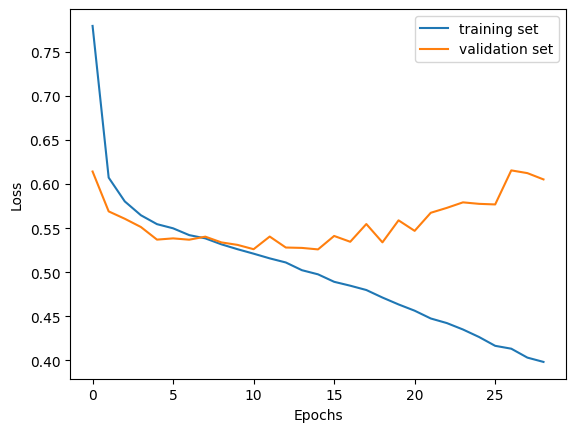

In [47]:
import matplotlib.pyplot as plt

total_epochs = history.params['epochs']
real_epochs = len(history.history['loss'])

print('Total epochs:', total_epochs)
print('Real epochs:', real_epochs)

x_epochs = [i for i in range(real_epochs)]
plt.plot(x_epochs, history.history['loss'], x_epochs, history.history['val_loss'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

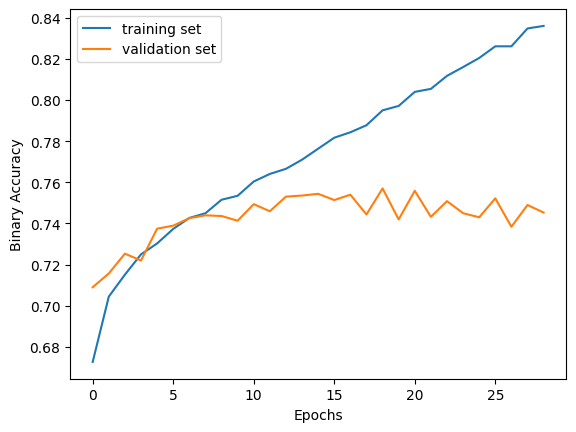

In [48]:
x_epochs = [i for i in range(real_epochs)]
plt.plot(x_epochs, history.history['binary_accuracy'], x_epochs, history.history['val_binary_accuracy'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.show()

In [49]:
loss, binary_accuracy, f1_score = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Binary Accuracy:', binary_accuracy)
print('F1 Score:', f1_score)

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - binary_accuracy: 0.7583 - f1_score: 0.5132 - loss: 0.5314
Loss: 0.533939003944397
Binary Accuracy: 0.75700843334198
F1 Score: tf.Tensor([0.3631178  0.59601593 0.5524861  0.5169628  0.5887207 ], shape=(5,), dtype=float32)


In [50]:
x_test.shape

(1912, 500, 128)

In [51]:
y_test_pred = model.predict(x_test)
y_test_pred[1], y_test[1]

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step


(array([0.51703334, 0.07731804, 0.34496254, 0.64561915, 0.3605103 ],
       dtype=float32),
 array([1, 0, 0, 1, 0]))